# 1. 加载数据

In [19]:
import pandas as pd
pd.set_option('display.max_columns',None)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)
train_df.head()

Train shape :  (4209, 378)
Test shape :  (4209, 377)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

# 2. Data Exploration

- ## 检查数据的特征数目和类别

In [20]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Variable Name", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Variable Name
0,int64,369
1,float64,1
2,object,8


- ## Min, Max, Mean, Std-Dev, etc.

In [21]:
numerical_variable_names = dtype_df.loc[dtype_df['Column Type'] == 'int64']['Variable Name']
agg_df = train_df[numerical_variable_names].agg(['min','max','mean','std'])
agg_df.sort_values(by='std', axis=1)

,X268,X297,X290,X289,X330,X347,X235,X293,X233,X107,X11,X93,X257,X207,X280,X288,X39,X33,X190,X270,X295,X296,X95,X260,X210,X259,X339,X42,X204,X205,X372,X384,X236,X369,X15,X269,X124,X319,X278,X40,X332,X89,X245,X318,X74,X153,X59,X252,X110,X87,X167,X92,X160,X357,X366,X83,X262,X266,X184,X86,X145,X277,X60,X253,X385,X248,X383,X91,X104,X24,X213,X67,X271,X353,X65,X307,X105,X192,X258,X281,X310,X123,X21,X16,X112,X199,X240,X365,X364,X227,X125,X335,X282,X183,X312,X97,X36,X30,X165,X299,X298,X26,X230,X254,X55,X34,X212,X78,X325,X172,X62,X216,X237,X169,X200,X370,X214,X102,X239,X53,X338,X122,X320,X243,X88,X309,X217,X242,X94,X90,X17,X382,X317,X249,X18,X380,X221,X341,X344,X99,X292,X267,X323,X379,X308,X173,X274,X196,X291,X32,X44,X302,X41,X63,X195,X77,X47,X106,X305,X10,X57,X159,X371,X141,X108,X211,X287,X231,X203,X82,X176,X174,X185,X373,X206,X255,X73,X378,X23,X56,X322,X175,X342,X345,X222,X134,X147,X48,X113,X340,X198,X333,X170,X79,X111,X131,X135,X66,X315,X69,X359,X197,X326,X152,X226,X28,X166,X38,X361,X75,X272,X143,X276,X228,X126,X264,X229,X328,X109,X140,X162,X138,X146,X284,X130,X128,X120,X52,X29,X279,X263,X232,X136,X54,X76,X306,X148,X349,X61,X301,X346,X179,X117,X177,X367,X348,X80,X352,X286,X331,X376,X98,X13,X164,X368,X208,X101,X219,X43,X256,X68,X12,X304,X155,X360,X343,X70,X238,X189,X151,X22,X139,X181,X265,X225,X241,X215,X19,X209,X244,X71,X84,X182,X49,X129,X133,X294,X336,X327,X283,X20,X114,X180,X201,X356,X144,X316,X116,X161,X234,X354,X285,X300,X150,X154,X50,X103,X374,X81,X142,X158,X37,X35,X31,X321,X247,X202,X96,X363,X45,X168,X275,X51,X273,X156,X157,X115,X351,X313,X163,X100,X132,X218,X377,X27,X224,X375,X350,X171,X64,X119,X118,X355,X251,X311,X46,X85,X246,X137,X261,X187,X58,X324,X358,X14,X314,X329,X220,X178,X223,X250,X334,X186,X194,X191,X362,X337,X127,ID
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

- ## 检查缺失值

In [22]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Variable Name', 'Missing Count']
missing_df = missing_df.loc[missing_df['Missing Count']>0]
missing_df = missing_df.sort_values(by='Missing Count')
missing_df

,Variable Name,Missing Count


- ## 检查特征与目标值的相关性

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


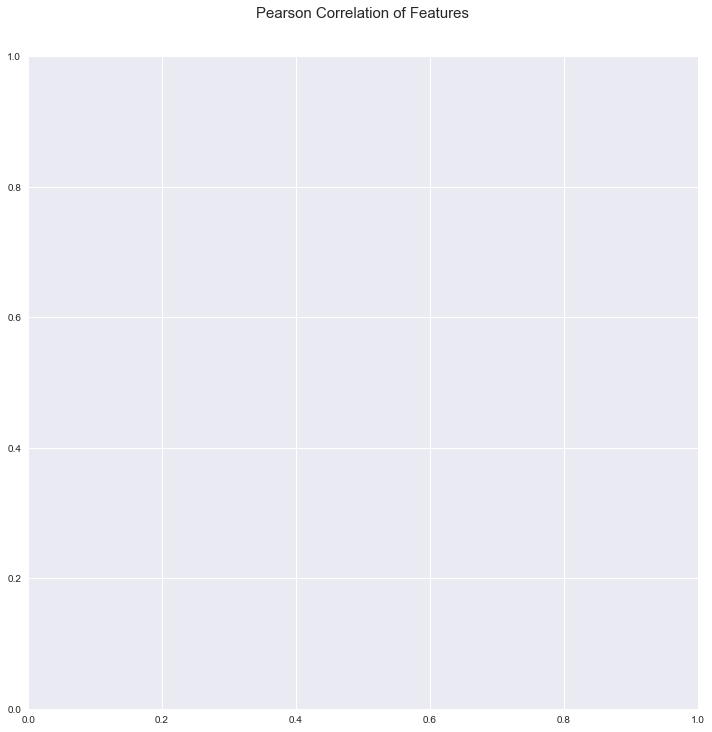

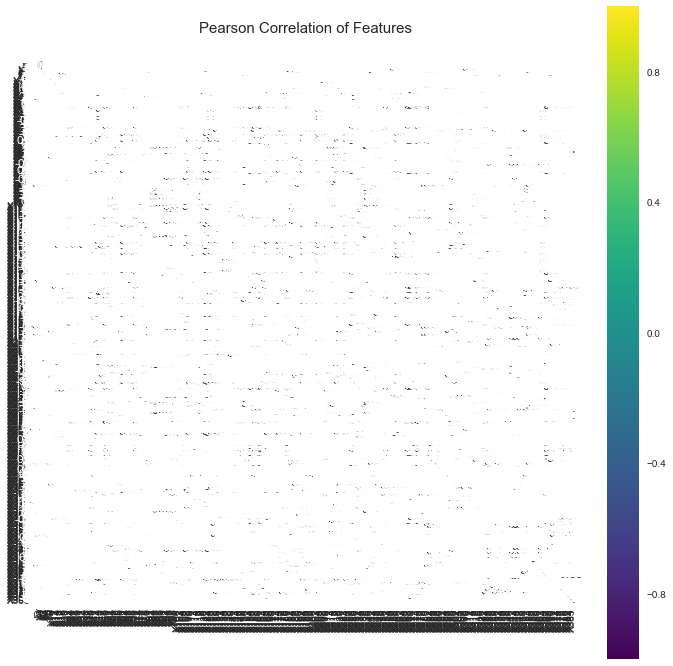

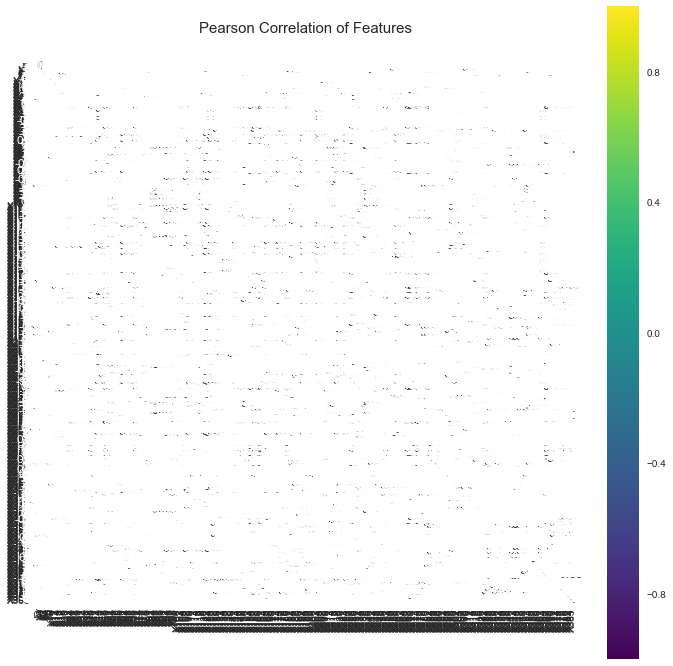

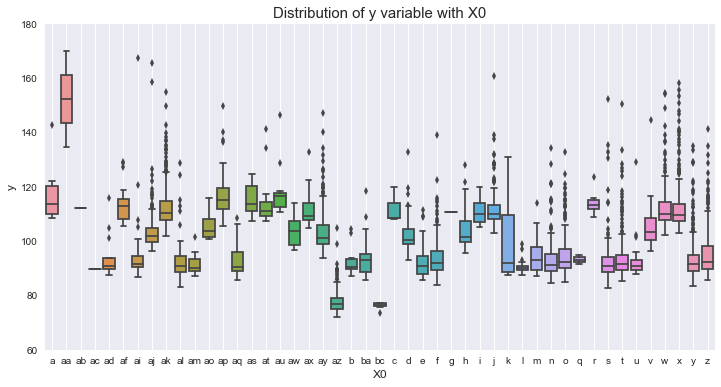

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

var_name = "X0"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.grid()
plt.ylim([60,180])
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

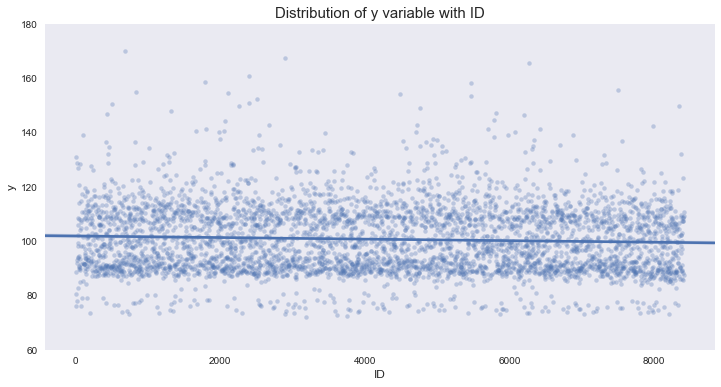

In [24]:
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=train_df, scatter_kws={'alpha':0.3, 's':20})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid()
plt.ylim([60,180])
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [25]:
#Run Label Encoder first !!!
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_sle_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


- ## 数据分布图

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


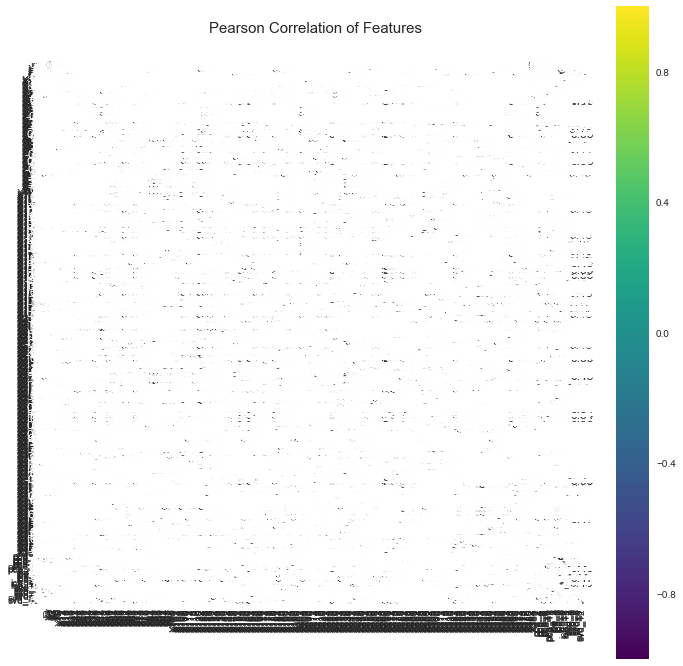

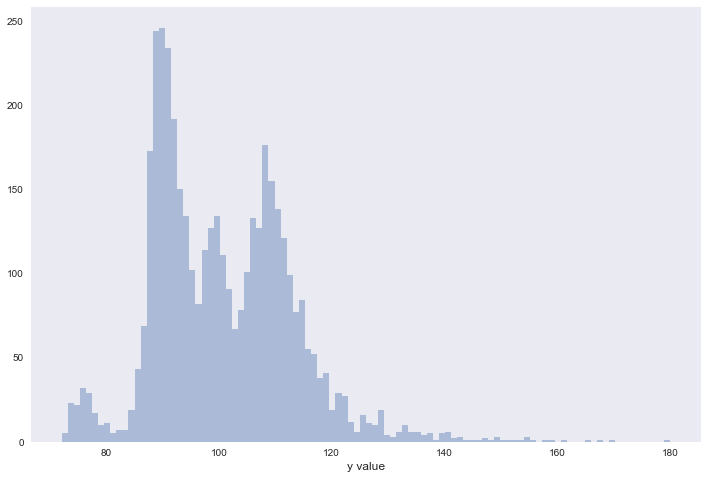

In [26]:
#去掉一个outlet，以得到更好的柱状图
ulimit = 180
train_df['y'].loc[train_df['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=100, kde=False)
plt.grid()
plt.xlabel('y value', fontsize=12)
plt.show()

# 3. 数据准备／清洗

- ## Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

train_sle_df = pd.DataFrame()
test_sle_df = pd.DataFrame()
for var in train_df:
    if train_df[var].dtype == "object":
        lbl = LabelEncoder()
        lbl.fit(list(train_df[var].values) + list(test_df[var].values))
        train_sle_df[var] = lbl.transform(list(train_df[var].values))
        test_sle_df[var] = lbl.transform(list(test_df[var].values))
    else:
        train_sle_df[var] = train_df[var]
        if var != "y":
            test_sle_df[var] = test_df[var]   
print('Train: ', train_sle_df.shape)
print('Test: ', test_sle_df.shape)
train_sle_df.head()

Train:  (4209, 378)
Test:  (4209, 377)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [29]:
from sklearn.preprocessing import LabelBinarizer

train_ohe_df = pd.DataFrame()
test_ohe_df = pd.DataFrame()

for var in train_df:
    if train_df[var].dtype == "object":
        ohe = LabelBinarizer()
        ohe.fit(list(train_df[var].values) + list(test_df[var].values))
        train_tmp_df = pd.DataFrame(ohe.transform(list(train_df[var].values)))
        train_tmp_df.columns = [var+"_"+c for c in ohe.classes_]
        train_ohe_df = pd.concat((train_ohe_df, train_tmp_df),axis=1)
        test_tmp_df = pd.DataFrame(ohe.transform(list(test_df[var].values)))
        test_tmp_df.columns = [var+"_"+c for c in ohe.classes_]
        test_ohe_df = pd.concat((test_ohe_df, test_tmp_df),axis=1)
    else:
        train_ohe_df[var] = train_df[var]
        if var != "y":
            test_ohe_df[var] = test_df[var]   
            
print('Train: ', train_ohe_df.shape)
print('Test: ', test_ohe_df.shape)
train_ohe_df.head()

Train:  (4209, 581)
Test:  (4209, 580)


,ID,y,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_ae,X0_af,X0_ag,X0_ai,X0_aj,X0_ak,X0_al,X0_am,X0_an,X0_ao,X0_ap,X0_aq,X0_as,X0_at,X0_au,X0_av,X0_aw,X0_ax,X0_ay,X0_az,X0_b,X0_ba,X0_bb,X0_bc,X0_c,X0_d,X0_e,X0_f,X0_g,X0_h,X0_i,X0_j,X0_k,X0_l,X0_m,X0_n,X0_o,X0_p,X0_q,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z,X1_a,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,X1_i,X1_j,X1_k,X1_l,X1_m,X1_n,X1_o,X1_p,X1_q,X1_r,X1_s,X1_t,X1_u,X1_v,X1_w,X1_y,X1_z,X2_a,X2_aa,X2_ab,X2_ac,X2_ad,X2_ae,X2_af,X2_ag,X2_ah,X2_ai,X2_aj,X2_ak,X2_al,X2_am,X2_an,X2_ao,X2_ap,X2_aq,X2_ar,X2_as,X2_at,X2_au,X2_av,X2_aw,X2_ax,X2_ay,X2_b,X2_c,X2_d,X2_e,X2_f,X2_g,X2_h,X2_i,X2_j,X2_k,X2_l,X2_m,X2_n,X2_o,X2_p,X2_q,X2_r,X2_s,X2_t,X2_u,X2_w,X2_x,X2_y,X2_z,X3_a,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g,X4_a,X4_b,X4_c,X4_d,X5_a,X5_aa,X5_ab,X5_ac,X5_ad,X5_ae,X5_af,X5_ag,X5_ah,X5_b,X5_c,X5_d,X5_f,X5_g,X5_h,X5_i,X5_j,X5_k,X5_l,X5_m,X5_n,X5_o,X5_p,X5_q,X5_r,X5_s,X5_t,X5_u,X5_v,X5_w,X5_x,X5_y,X5_z,X6_a,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_a,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,

In [30]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_sle_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


# 4. Feature Engineering

In [32]:
from sklearn.decomposition import PCA, FastICA, TruncatedSVD

n_components = 12
pca = PCA(n_components = n_components, random_state=64)
pca_results_train = pca.fit_transform(train_sle_df.drop(['y', 'ID'], axis=1))
pca_results_test = pca.transform(test_sle_df.drop(['ID'], axis=1))

ica = FastICA(n_components = n_components, random_state=64)
ica_results_train = ica.fit_transform(train_sle_df.drop(['y', 'ID'], axis=1))
ica_results_test = ica.transform(test_sle_df.drop(['ID'], axis=1))

svd = TruncatedSVD(n_components = n_components,  n_iter=7, random_state=64)
svd_results_train = svd.fit_transform(train_sle_df.drop(['y', 'ID'], axis=1))
svd_results_test = svd.transform(test_sle_df.drop(['ID'], axis=1))

for i in range(1, n_components + 1):
    train_sle_df['pca_' + str(i)] = pca_results_train[:, i - 1]
    test_sle_df['pca_' + str(i)] = pca_results_test[:, i - 1]
    
for i in range(1, n_components + 1):
    train_sle_df['ica_' + str(i)] = ica_results_train[:, i - 1]
    test_sle_df['ica_' + str(i)] = ica_results_test[:, i - 1]
    
for i in range(1, n_components + 1):
    train_sle_df['svd_' + str(i)] = svd_results_train[:, i - 1]
    test_sle_df['svd_' + str(i)] = svd_results_test[:, i - 1]
    
print('Train: ', train_sle_df.shape)
print('Test: ', test_sle_df.shape)
train_sle_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Train:  (4209, 414)
Test:  (4209, 413)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,ica_1,ica_2,ica_3,ica_4,ica_5,ica_6,ica_7,ica_8,ica_9,ica_10,ica_11,ica_12,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12
0,0,130.81,37,23,20,0,3,27,9,14,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.207636,0.024443,14.864508,8.131696,1.414920,-2.695534,3.821965,1.536078,-0.651198,1.731787,0.321431,0.348438,-0.004715,0.011984,0.018959,0.001203,-0.021355,0.001015,-0.025613,-0.021578,-0.003514,-0.013216,-0.002304,0.024603,55.330757,5.767961,-13.682584,0.892273,-3.427856,0.651883,-5.557195,2.548881,-0.410464,1.754437,0.160244,-0.395415
1,6,88.53,37,21,22,4,3,31,11,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.244088,1.731675,18.211080,5.240202,1.580505,-4.442921,-0.792937,0.819098,-0.795497,-0.150198,0.765954,-0.356864,

# 5. Models Training & Hyper-Parameters Tuning

- ## Data Spliting

In [14]:
from sklearn.model_selection import train_test_split
model_train_sle_df, weight_train_sle_df = train_test_split(train_sle_df, test_size=0.15, random_state=64)
n_splits = 4
from sklearn.model_selection import KFold
kfold = KFold(n_splits=n_splits, random_state = 64, shuffle=True)

- ## Traditional Models

### 5.1 Stacked Model A

#### Step 1: 定义 Stacked Model

In [15]:
from sklearn.linear_model import LassoLarsCV, LassoCV
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.utils import check_array

class StackedModel():
    class StackingEstimator(BaseEstimator, TransformerMixin):
        def __init__(self, estimator):
            self.estimator = estimator

        def fit(self, X, y=None, **fit_params):
            self.estimator.fit(X, y, **fit_params)
            return self
        def transform(self, X):
            X = check_array(X)
            X_transformed = np.copy(X)
            # add class probabilities as a synthetic feature
            if issubclass(self.estimator.__class__, ClassifierMixin) and hasattr(self.estimator, 'predict_proba'):
                X_transformed = np.hstack((self.estimator.predict_proba(X), X))

            # add class prodiction as a synthetic feature
            X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))
            return X_transformed
    def __init__(self):
        self.model_ = None
    
    def fit(self, X, y, learning_rate=0.0001, n_estimators=100, max_depth=3, max_features=0.55, min_samples_leaf=18, min_samples_split=14, subsample=0.7 ):
        self.model_ = make_pipeline(self.StackingEstimator(estimator=LassoCV(normalize=True,random_state=64, max_iter=2000)),
        self.StackingEstimator(estimator=GradientBoostingRegressor(n_estimators = n_estimators, learning_rate=learning_rate, loss="huber", max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, subsample=subsample)),
        LassoCV(random_state=64, max_iter=2000))
        self.model_.fit(X,y)
    
    def predict(self, X, y=None):
        if self.model_ != None:
            pred = self.model_.predict(X)
        else:
            print("Error: Model has not been trained!")
            pred = None
        if y is None:
            return pred, 0
        else:
            
            return pred, r2_score( y,pred)

#### Step 2: Hyper-parameters tuning

In [16]:
from sklearn.model_selection import ParameterGrid
import warnings
#关闭训练过程中的warning
warnings.simplefilter("default")

hyper_params = {'learning_rate': [0.001, 0.01], 'n_estimators': [100, 400, 1200]}
params_grid = ParameterGrid(hyper_params)
tuning_results = []
best_param = None
best_r2_score = -np.Infinity
stacked_model = StackedModel()
data = model_train_sle_df.drop(['y'], axis=1).values
label = model_train_sle_df['y'].values
for param in params_grid:
    avg_r2_score = 0
    for train_idx, val_idx in kfold.split(data):
        train_X = data[train_idx]
        train_Y = label[train_idx]
        val_X = data[val_idx]
        val_Y = label[val_idx]
        stacked_model.fit(train_X, train_Y, **param)
        _, r2 = stacked_model.predict(val_X, val_Y)
        avg_r2_score += r2
    avg_r2_score /= n_splits
    if avg_r2_score > best_r2_score:
        best_r2_score = avg_r2_score
        best_param = param
    tuning_results.append({'param': param, 'r2score': avg_r2_score})
    print(param, avg_r2_score)
print('Best param', best_param)
print('Best score', best_r2_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'learning_rate': 0.001, 'n_estimators': 100} 0.544253799226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'learning_rate': 0.001, 'n_estimators': 400} 0.544215389194


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'learning_rate': 0.001, 'n_estimators': 1200} 0.560881625021


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'learning_rate': 0.01, 'n_estimators': 100} 0.559636364225


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'learning_rate': 0.01, 'n_estimators': 400} 0.561557928788


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'learning_rate': 0.01, 'n_estimators': 1200} 0.558599216018
Best param {'learning_rate': 0.01, 'n_estimators': 400}
Best score 0.561557928788


### 5.2 Stacked Model B

#### Step 1: 定义 Stacked Model

In [18]:
from sklearn.pipeline import Pipeline
class StackingEstimator(BaseEstimator, TransformerMixin):
    def __init__(self,  estimator, mix_data = False):
        self.estimator = estimator
        self.mix_data = mix_data

    def fit(self, X, y=None, **fit_params):
        self.estimator.fit(X, y, **fit_params)
        return self

    def transform(self, X):
        X = check_array(X)
        if self.mix_data:
            X_transformed = np.copy(X)
            # add class probabilities/decision_functions as a synthetic feature
            if hasattr(self.estimator, 'predict_proba'):
                X_transformed = np.hstack((self.estimator.predict_proba(X), X))
            elif hasattr(self.estimator, 'decision_function'):
                X_transformed = np.hstack((self.estimator.decision_function(X), X))
        else:
            if hasattr(self.estimator, 'predict_proba'):
                X_transformed = self.estimator.predict_proba(X)
            elif hasattr(self.estimator, 'decision_function'):
                X_transformed = self.estimator.decision_function(X)
        # add class prodiction as a synthetic feature
        X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))
        return X_transformed
    
pipline = Pipeline([('level1',FeatureUnion(transformer_list=[('LinearSVC', StackingEstimator(LinearSVC(), mix_data=True)),
                        ('RF', StackingEstimator(RandomForestClassifier(n_estimators=100))),
                        ('Lasso', StackingEstimator(estimator=LassoCV(normalize=True,random_state=64, max_iter=2000)))])),
                    ('level2', StackingEstimator(estimator=GradientBoostingClassifier(mix_data=True))),
                    ('level3', StackingEstimator(LassoCV(random_state=64, max_iter=2000)))])

NameError: name 'FeatureUnion' is not defined

### 5.3 XGBoost

In [ ]:
model_train_sle_df.drop(['y'], axis=1).columns

In [16]:
x=list(model_train_sle_df.columns)
x.remove('y')
x

### 5.2.1 XGBoost使用三部曲

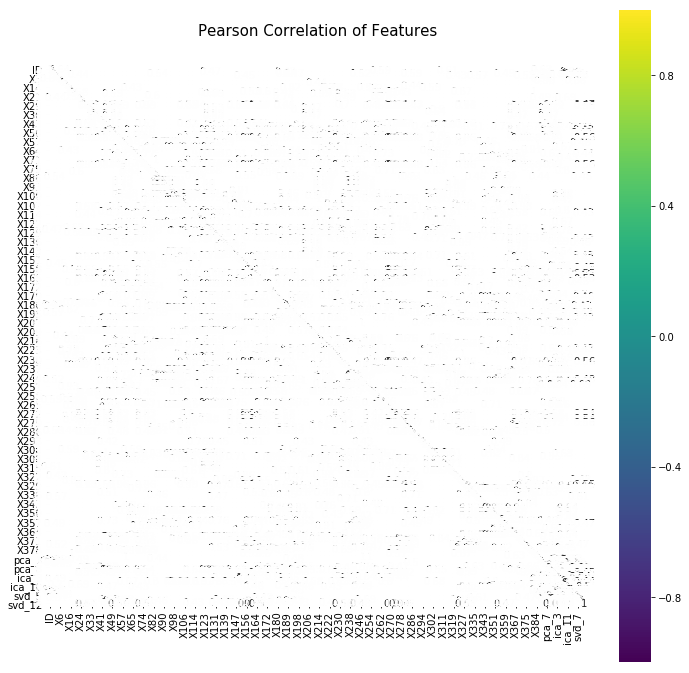

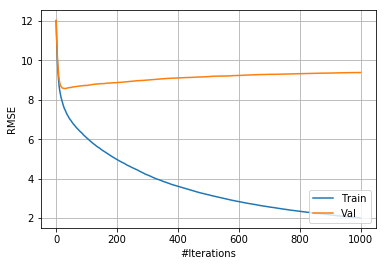

In [35]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def feval(preds, data):
    labels = data.get_label()
    return 'r2score', r2_score(y_true=labels,y_pred=preds)

model_train_sle_df.to_csv('model_train_sle_df.csv',index=False)
data = model_train_sle_df.drop(['y'], axis=1).values
var_names = list(model_train_sle_df.columns)
var_names.remove('y')
label = model_train_sle_df['y'].values
avg_r2_score = 0
avg_results = {'Train':[],'Val':[]}
num_boost_round = 1000
for train_idx, val_idx in kfold.split(data):
    #Step 1 加载数据
    train_X = data[train_idx]
    train_Y = label[train_idx]
    val_X = data[val_idx]
    val_Y = label[val_idx]
    dtrain = xgb.DMatrix(train_X, train_Y,feature_names=
var_names)
    dval = xgb.DMatrix(val_X, val_Y,feature_names=
var_names)
    #Step 2 训练模型
    xgb_params = { 
        'eta': 0.1,
        'max_depth': 4,
        'subsample': 0.93,
        #  回归任务常使用 reg:linear
        #  分类任务常使用 binary:logistic／multi:softmax
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'base_score': np.mean(train_Y),
        'silent': 0
    }
    # 保存boosting每个Iteration的eval result
    evals_result = {}
    model = xgb.train(xgb_params, dtrain, verbose_eval= False, num_boost_round=num_boost_round, evals = [(dtrain, "Train"), (dval, "Validation")], 
                         feval=feval, evals_result=evals_result)
    # 搜集eval result
    for ret in evals_result:
        if ret.find('Train') != -1: 
            avg_results['Train'].append(evals_result[ret]['rmse'])
            #avg_results['Train'].append(evals_result[ret]['r2score'])
        elif ret.find('Val') != -1:
            avg_results['Val'].append(evals_result[ret]['rmse'])
            #avg_results['Val'].append(evals_result[ret]['r2score'])
#print(avg_results)
plt.figure()
for ret in avg_results:
    avg_results[ret] = np.mean(avg_results[ret], axis=0)
    plt.plot(avg_results[ret], label=ret)

plt.grid()
plt.legend(loc="lower right")
plt.xlabel('#Iterations')
plt.ylabel('RMSE')
#plt.ylabel('R2 score')
plt.show()


### 5.2.2 hyper-parameter tuning

In [17]:
import xgboost as xgb

def feval(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2score', r2_score(y_true=labels,y_pred=preds)
    
hyper_params = {'eta': [0.001, 0.01], 'max_depth': [3, 4]}
num_boost_rounds = 2000
params_grid = ParameterGrid(hyper_params)
tuning_results = []
best_param = None
best_r2_score = -np.Infinity
stacked_model = StackedModel()
data = model_train_sle_df.drop(['y'], axis=1).values
label = model_train_sle_df['y'].values
default_xgb_params = { 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': 100., # base prediction = mean(target)
    'silent': 0
}
for param in params_grid:
    avg_r2_score = 0
    for train_idx, val_idx in kfold.split(data):
        train_X = data[train_idx]
        train_Y = label[train_idx]
        val_X = data[val_idx]
        val_Y = label[val_idx]
        dtrain = xgb.DMatrix(train_X, train_Y)
        dval = xgb.DMatrix(val_X, val_Y)
        
        xgb_params = default_xgb_params.copy()
        evals_result = {}
        for key in param:
            xgb_params[key] = param[key]
        # train model
        model = xgb.train(xgb_params, dtrain, verbose_eval= False, num_boost_round=num_boost_rounds, evals = [(dval, "Validation")], 
                         feval=feval, evals_result=evals_result)
        avg_r2_score += np.array(evals_result['Validation']['r2score'])
    avg_r2_score /=n_splits
    imax_num_boost_round = np.argmax(avg_r2_score)
    avg_r2_score = avg_r2_score[imax_num_boost_round]
    if avg_r2_score > best_r2_score:
        best_r2_score = avg_r2_score
        best_param = param
    param['num_boost_round'] = imax_num_boost_round
    tuning_results.append({'param': param , 'r2score': avg_r2_score})
    print(param, avg_r2_score)
print('Best param', best_param)
print('Best score', best_r2_score)

({'num_boost_round': 1999, 'eta': 0.001, 'max_depth': 3}, 0.56235299999999999)
({'num_boost_round': 1999, 'eta': 0.001, 'max_depth': 4}, 0.56158200000000003)
({'num_boost_round': 373, 'eta': 0.01, 'max_depth': 3}, 0.57402500000000001)
({'num_boost_round': 305, 'eta': 0.01, 'max_depth': 4}, 0.56997374999999995)
('Best param', {'num_boost_round': 373, 'eta': 0.01, 'max_depth': 3})
('Best score', 0.57402500000000001)


# 6. Feature Importance

In [87]:
import numpy as np
import xgboost as xgb
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

beta = np.array([5.,5.,2.,0,-5.,-2., 0, 0,0,0])
cov = np.array([[1, 0.3, 0.3, 0, 0, 0, 0, 0, 0, 0],
                [0.3, 1, 0.3, 0, 0, 0, 0, 0, 0, 0],
                [0.3, 0.3, 1, 0, 0, 0, 0, 0, 0, 0],
                [0,   0,   0, 1, 0, 0, 0, 0, 0, 0],
                [0,   0,   0, 0, 1, 0, 0, 0, 0, 0],
                [0,   0,   0, 0, 0, 1, 0, 0, 0, 0],
                [0,   0,   0, 0, 0, 0, 1, 0, 0, 0],
                [0,   0,   0, 0, 0, 0, 0, 1, 0, 0],
                [0,   0,   0, 0, 0, 0, 0, 0, 1, 0],
                [0,   0,   0, 0, 0, 0, 0, 0, 0, 1]])

mean = np.zeros(10)
num_samples = 2000
data_X = np.random.multivariate_normal(mean, cov, [num_samples])
data_Y = np.dot(data_X,beta) + 0.5*np.random.randn(num_samples)

train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.15, random_state=64)
dtrain = xgb.DMatrix(train_X, train_Y, feature_names=['X%d'%i for i in range(10)])
dtest = xgb.DMatrix(test_X, test_Y, feature_names=['X%d'%i for i in range(10)])

default_xgb_params = { 
    'eta': 0.001,
    'max_depth': 3,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_Y),
    'silent': 0
}
model = xgb.train(xgb_params, dtrain, verbose_eval= True, num_boost_round=1000)

score_weight = model.get_score(importance_type='weight')
score_gain = model.get_score(importance_type='gain')
score_cover = model.get_score(importance_type='cover')

# print(score_weight)
# print(score_gain)
# print(score_cover)

score_general = []
pred = model.predict(dtest)
for i in range(10):
    test_X0 = test_X.copy()
    random.shuffle(test_X0[:,i])
    dtest0 = xgb.DMatrix(test_X0, test_Y, feature_names=['X%d'%i for i in range(10)])
    pred0 = model.predict(dtest0)
    score_general.append(np.abs(np.sum((test_Y-pred0)**2)**0.5 - np.sum((test_Y-pred)**2)**0.5))
sum_weight = 0
sum_gain = 0
sum_cover = 0
for i in range(10):
    sum_weight += score_weight['X%d'%i]
    sum_gain += score_gain['X%d'%i]
    sum_cover += score_cover['X%d'%i]
for i in range(10):
    print('%f %f %f %f'%(score_weight['X%d'%i]/float(sum_weight), score_gain['X%d'%i]/sum_gain, score_cover['X%d'%i]/sum_cover, score_general[i]/np.sum(score_general)))

0.163667 0.314351 0.076099 0.270844
0.129693 0.340975 0.103441 0.272208
0.103165 0.092804 0.091604 0.091950
0.081756 0.001240 0.092221 0.000237
0.115188 0.189849 0.103827 0.285450
0.097968 0.054752 0.106178 0.077606
0.079507 0.001389 0.114221 0.000455
0.078266 0.001516 0.099466 0.000639
0.083618 0.001567 0.107148 0.000344
0.067173 0.001557 0.105794 0.000267
